In [1]:
import rasterio as rio
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as feature
import numpy as np
from skimage import img_as_ubyte
import matplotlib
import os
from rasterio.plot import show, show_hist

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (20, 12)



In [2]:
DATA_ROOT = "./data/"
imagesindex = "train_v2.csv"
imagedir = 'train-tif-v2'
jpgdir = 'train-jpg'
img_template = "train_%d.%s"
images = pd.read_csv(os.path.join(DATA_ROOT, imagesindex))
images.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

/home/ec2-user/miniconda3/envs/imageprocess/lib/python3.6/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


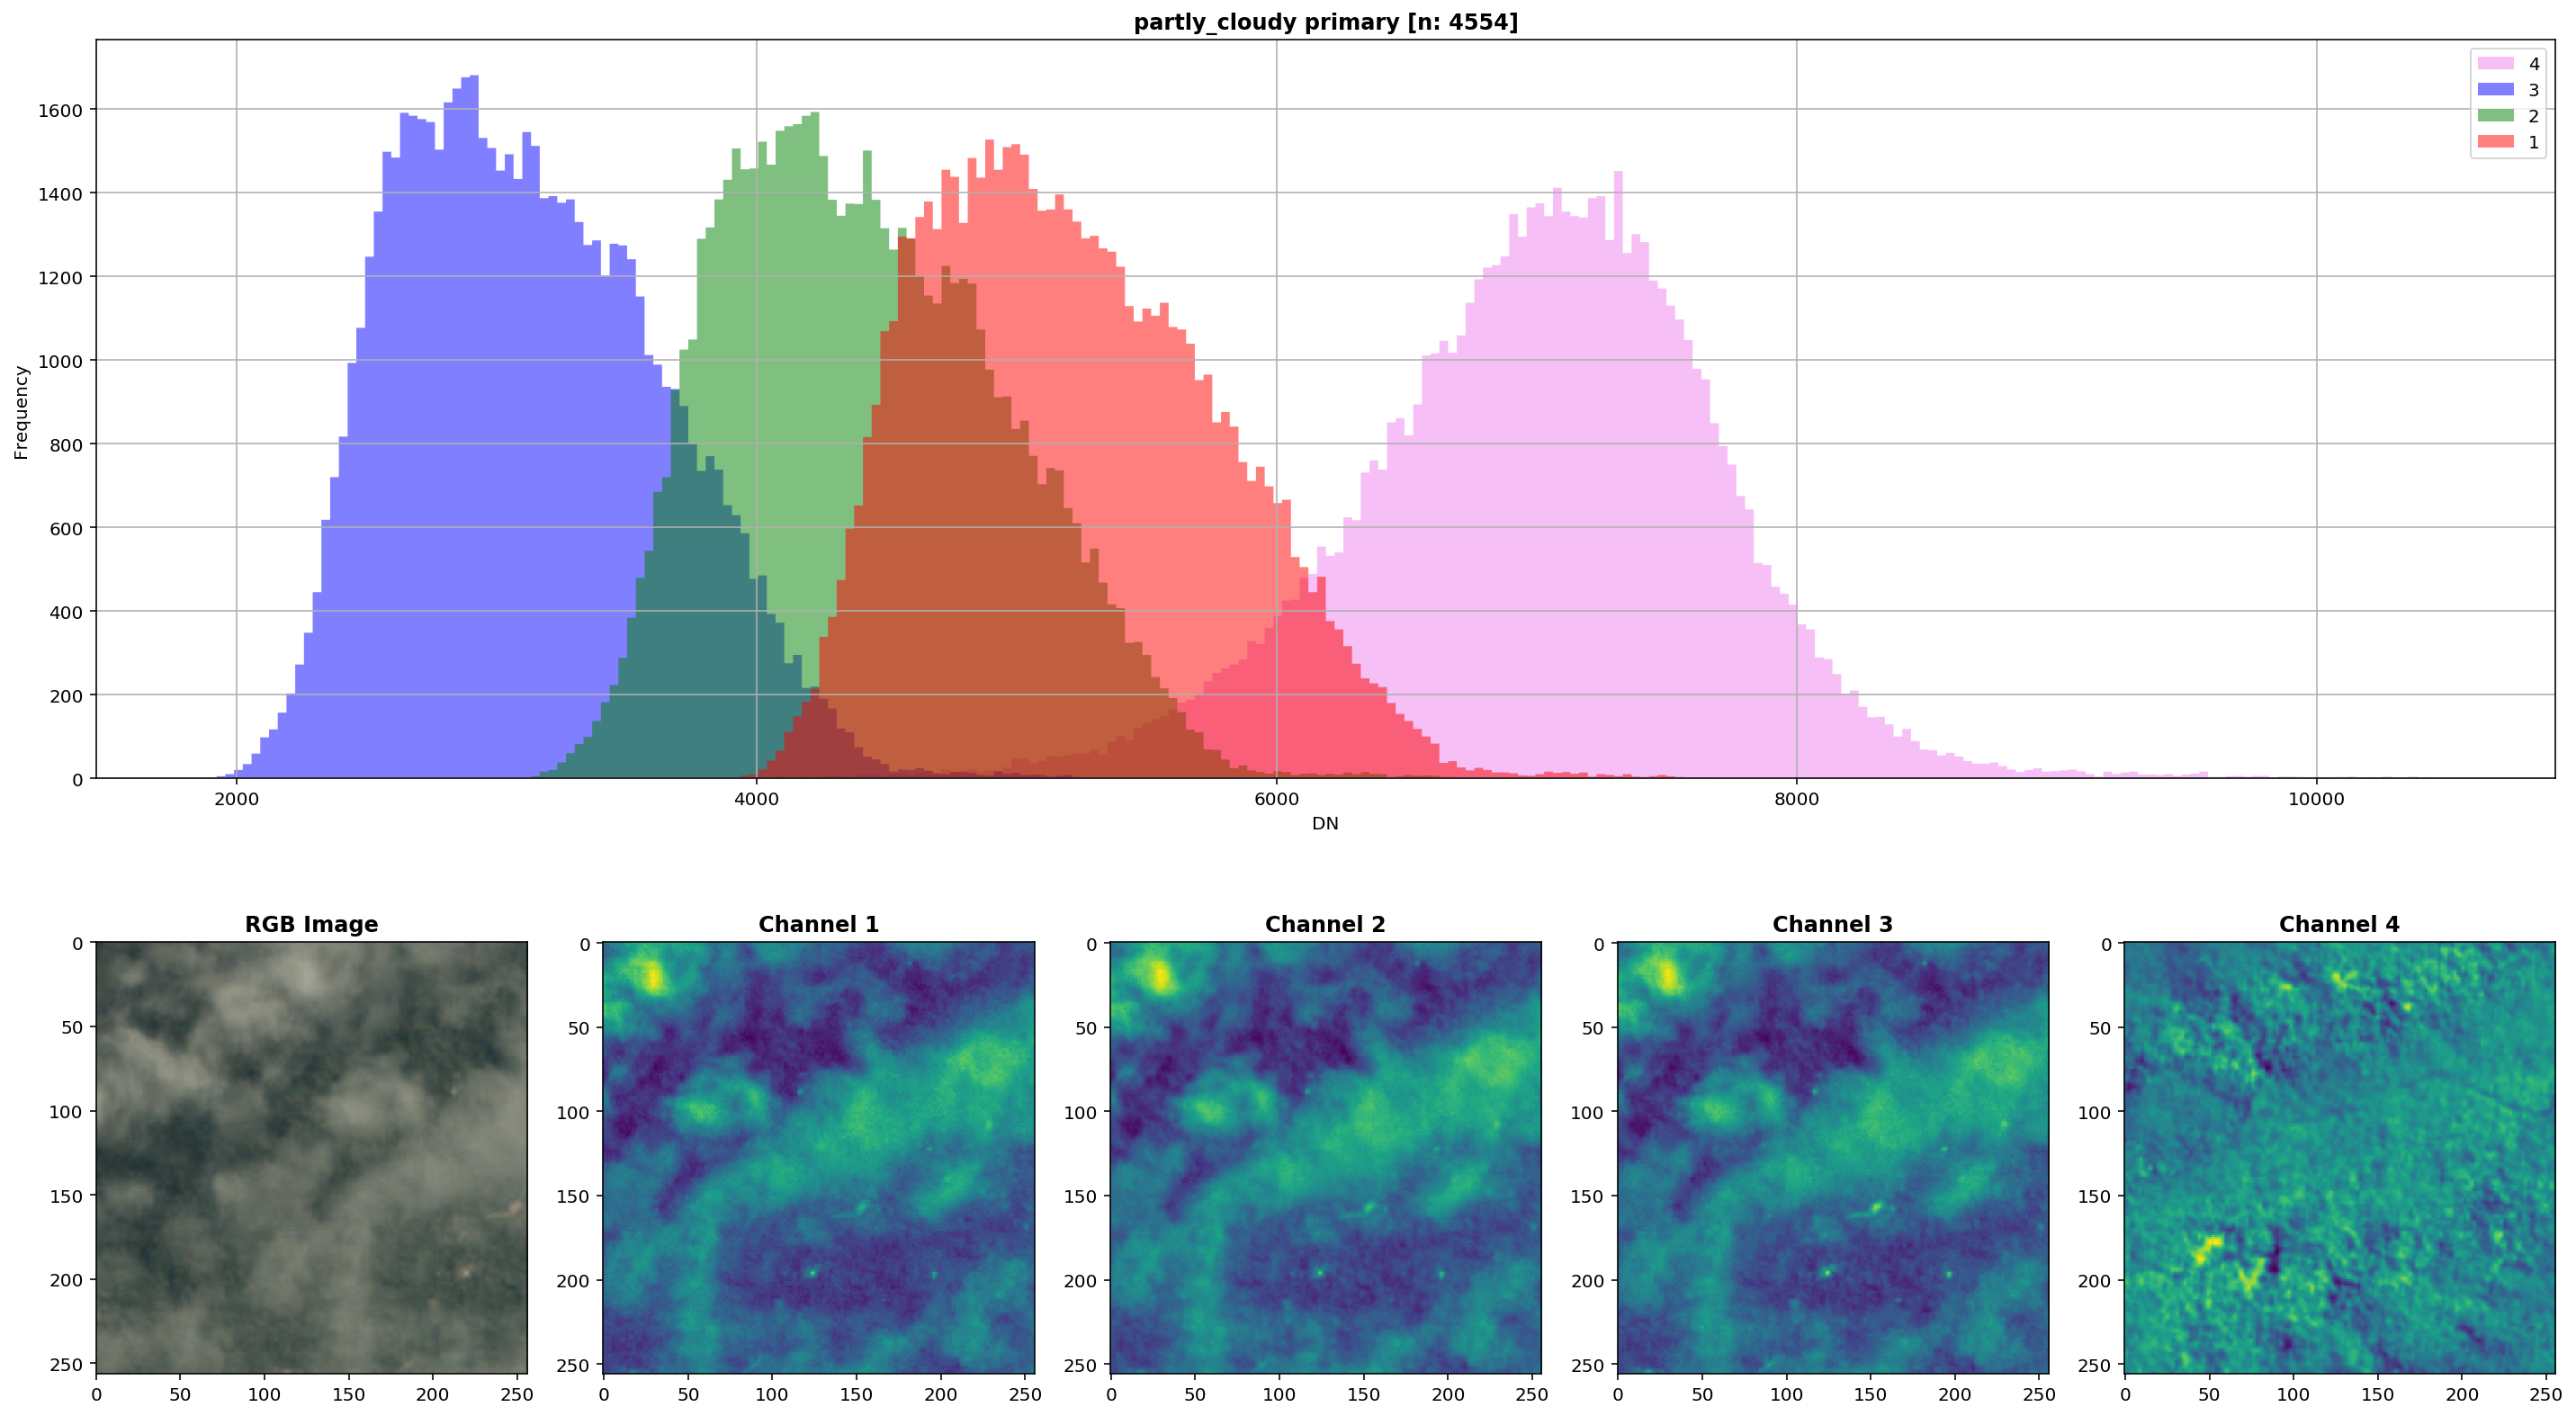

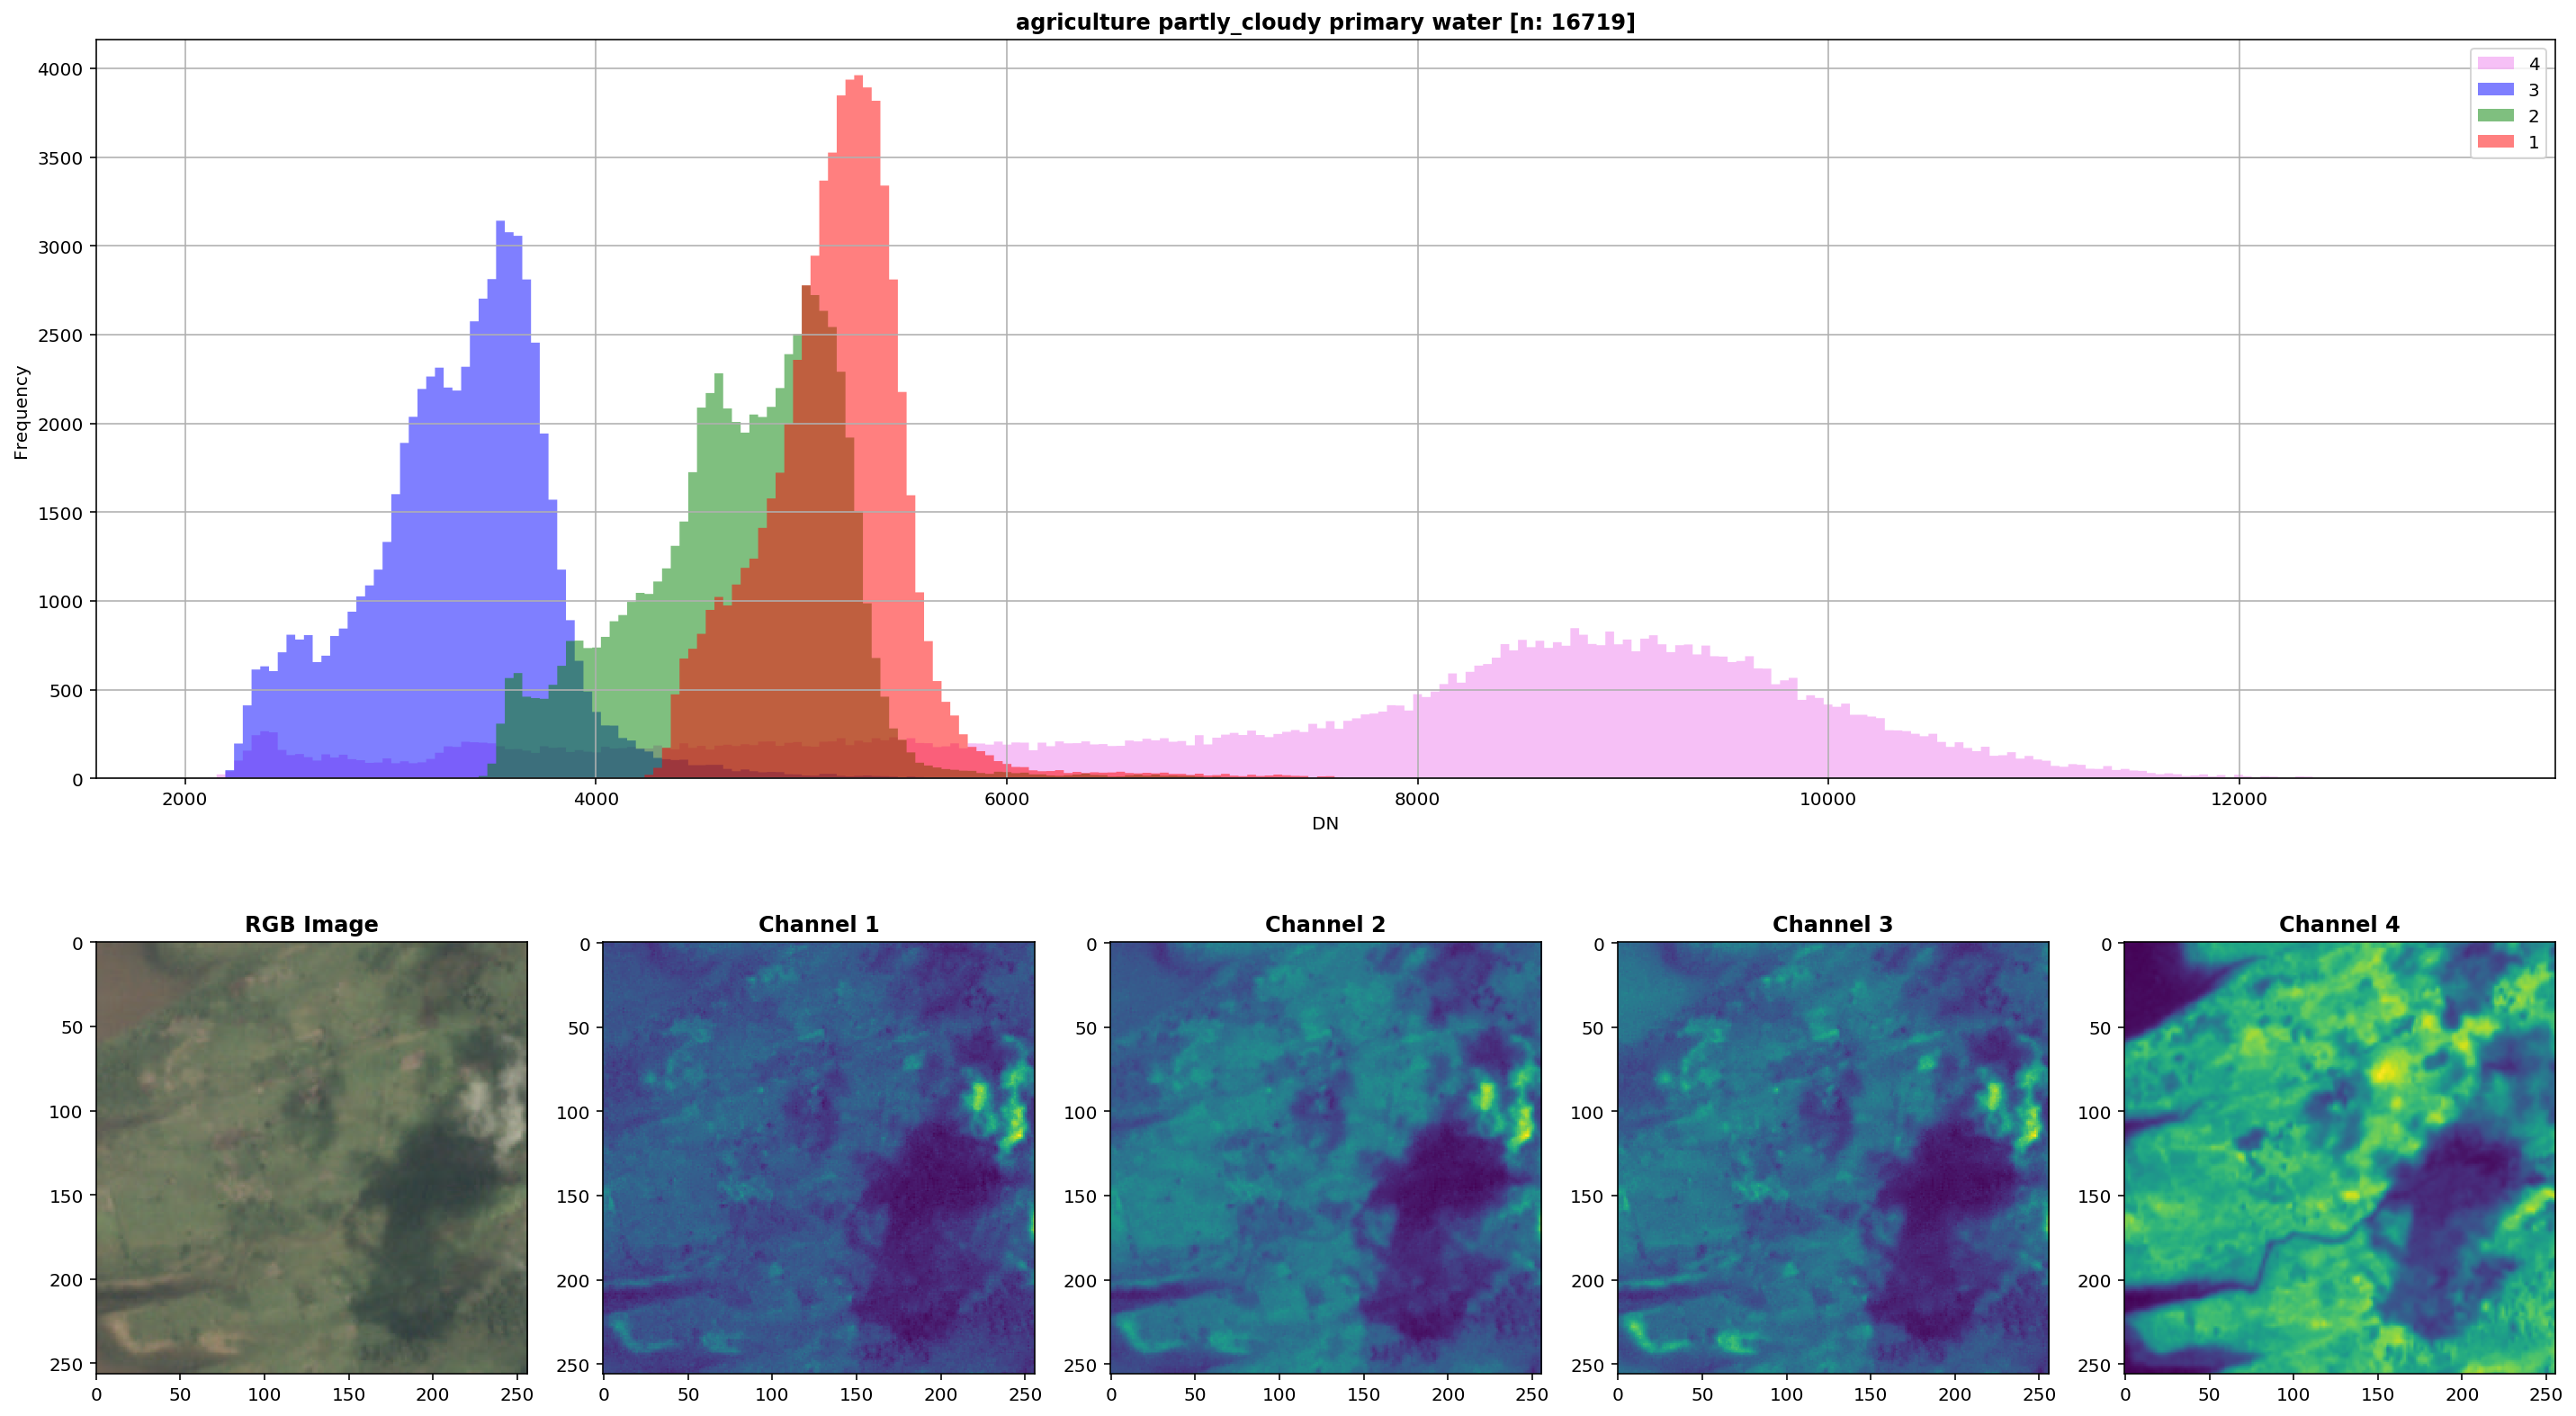

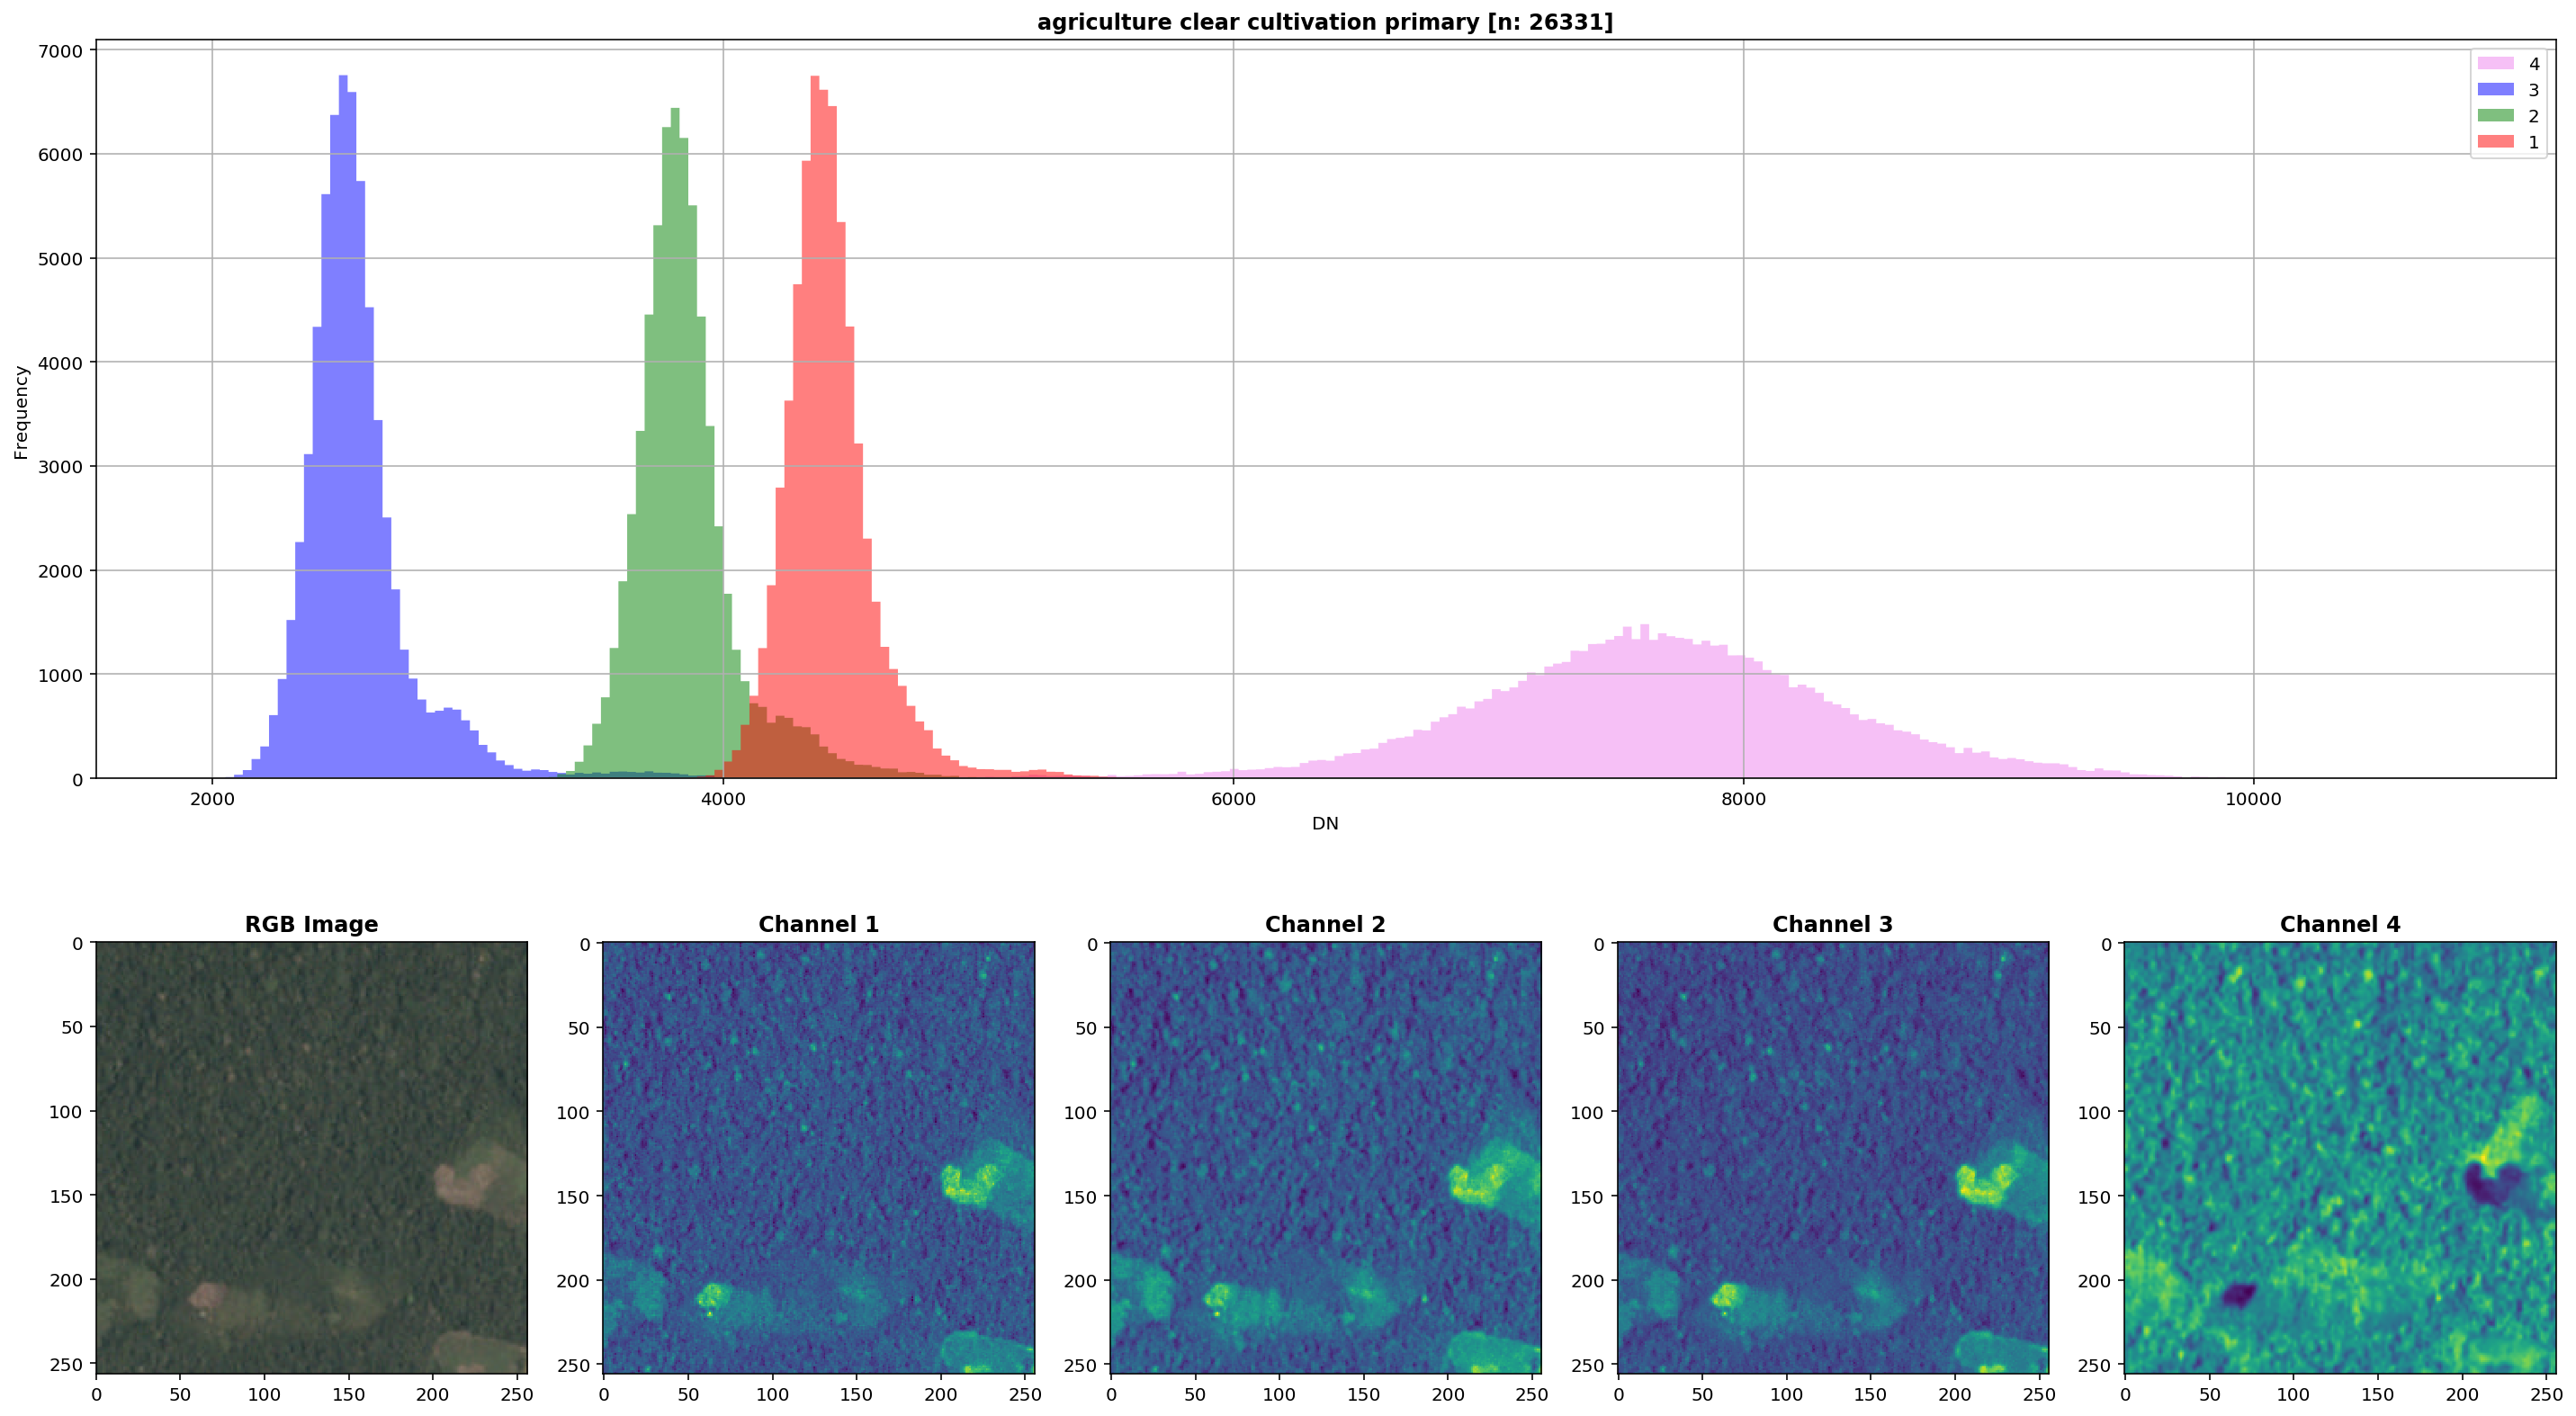

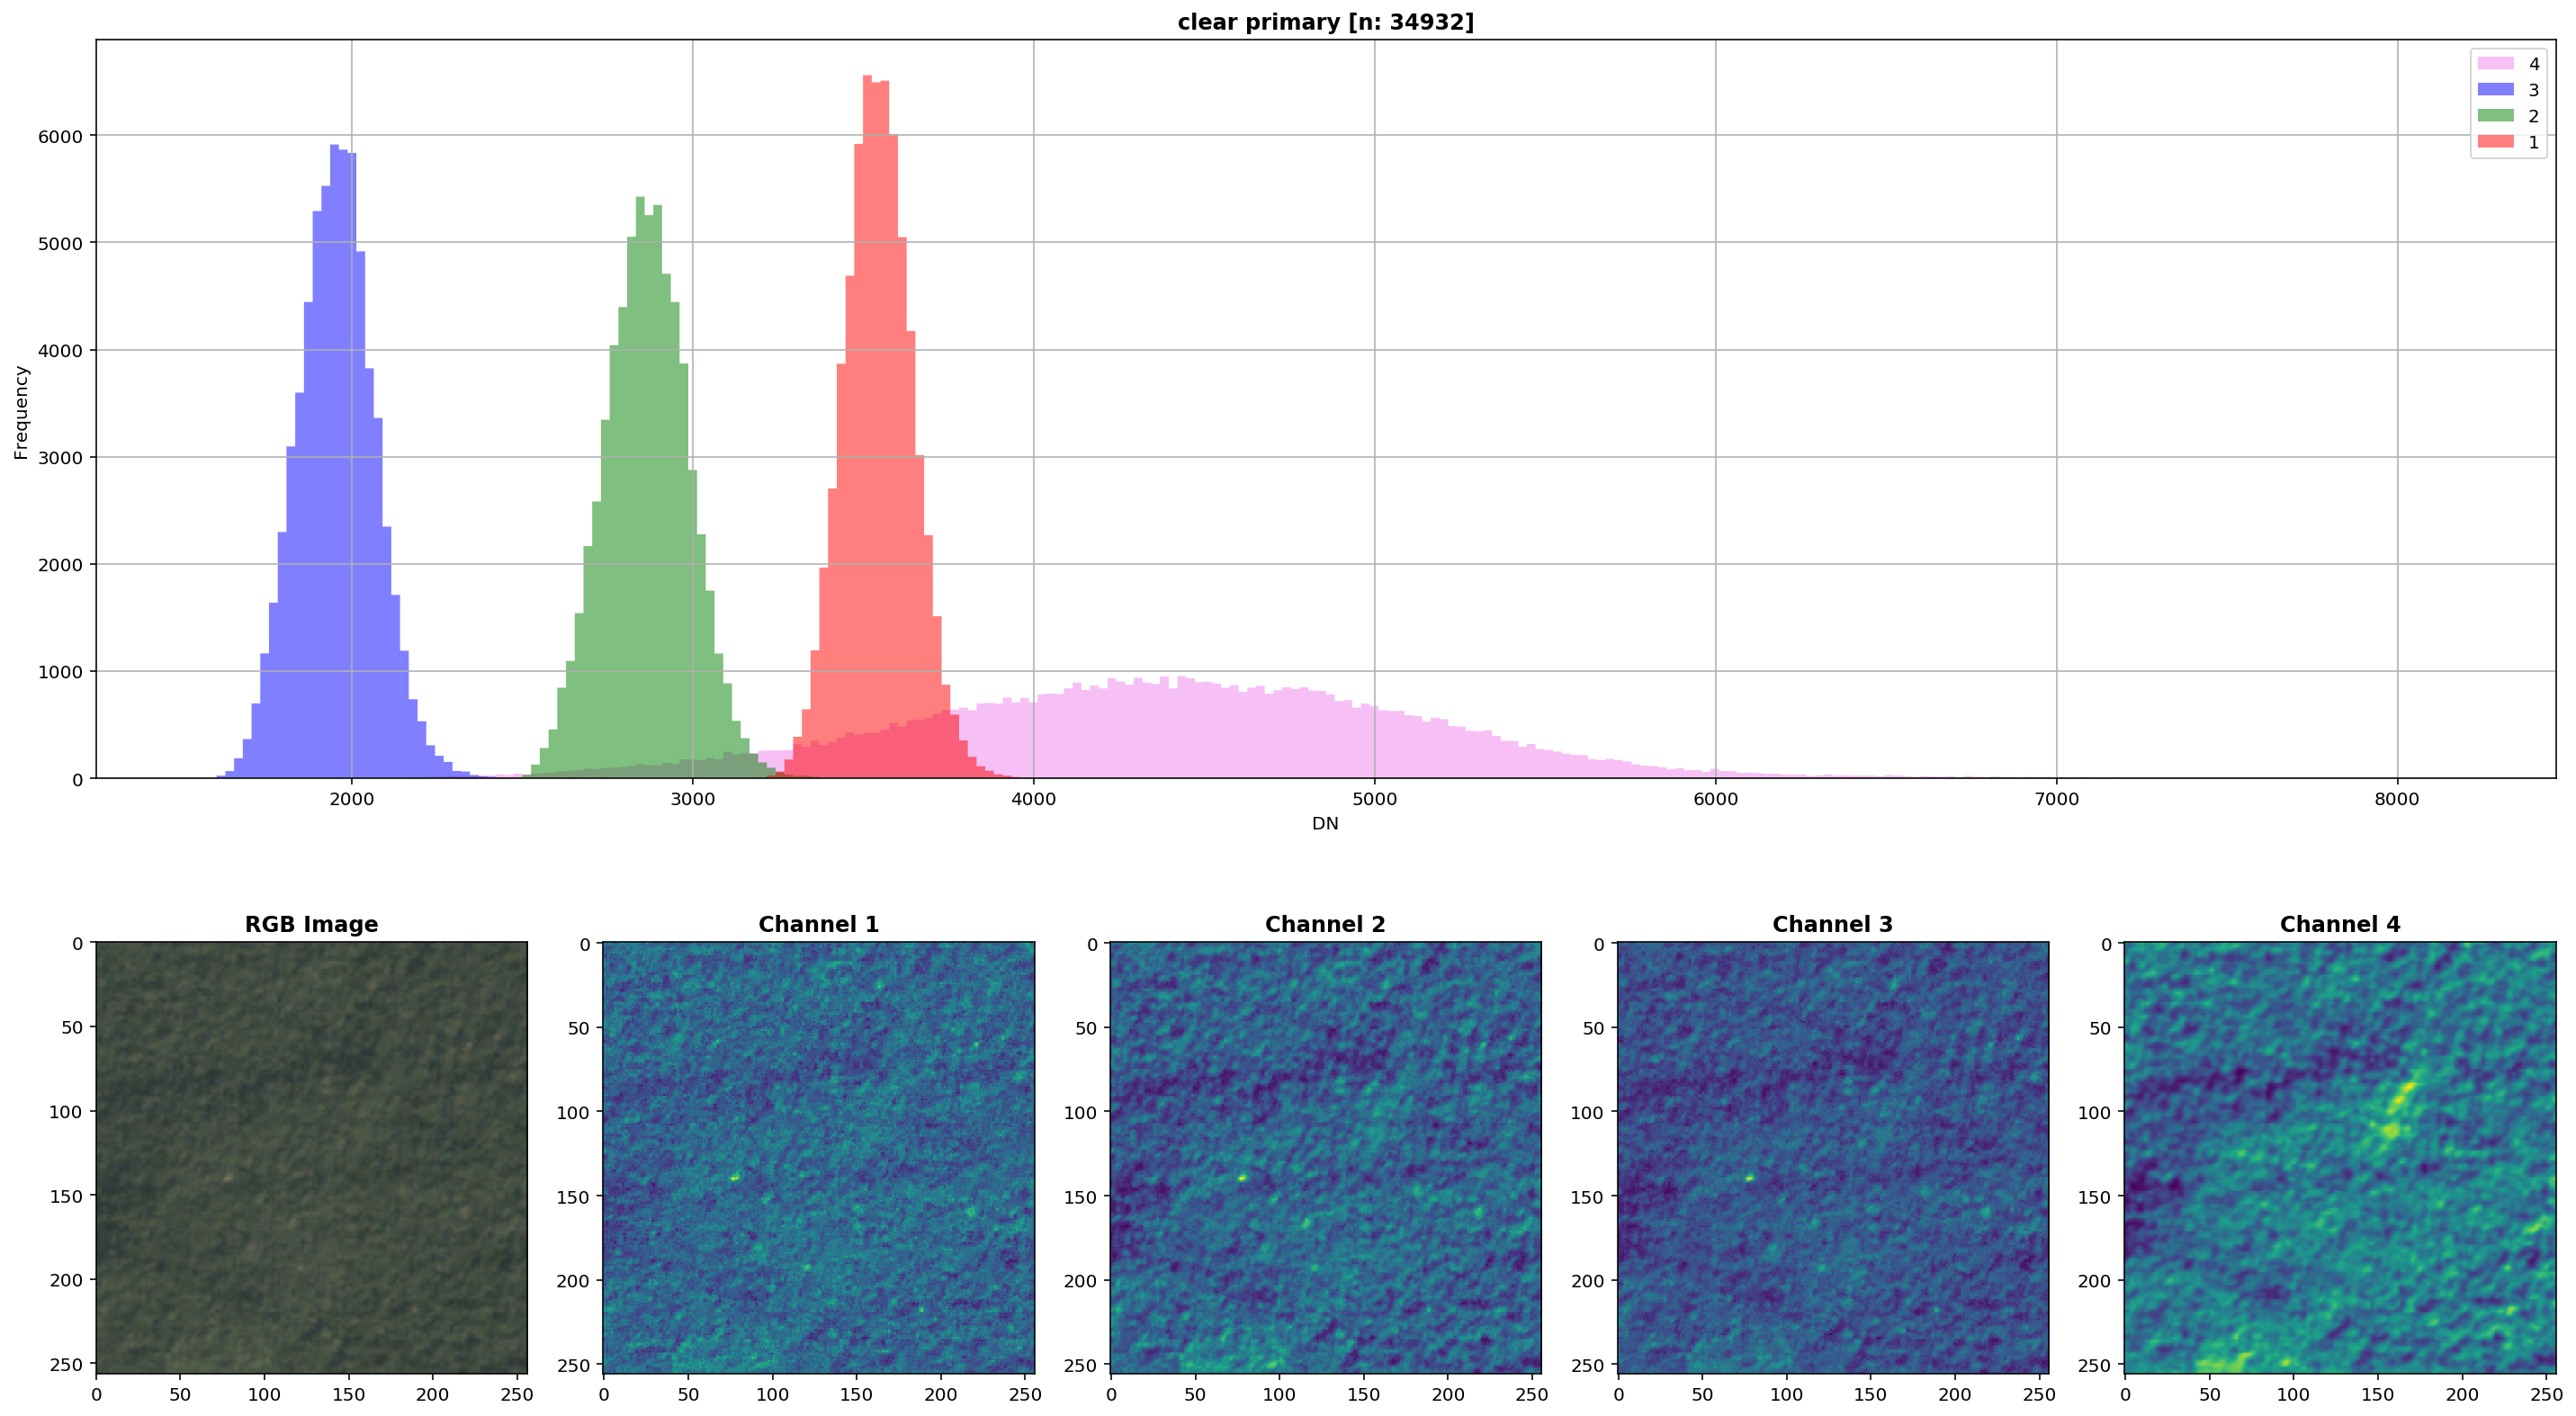

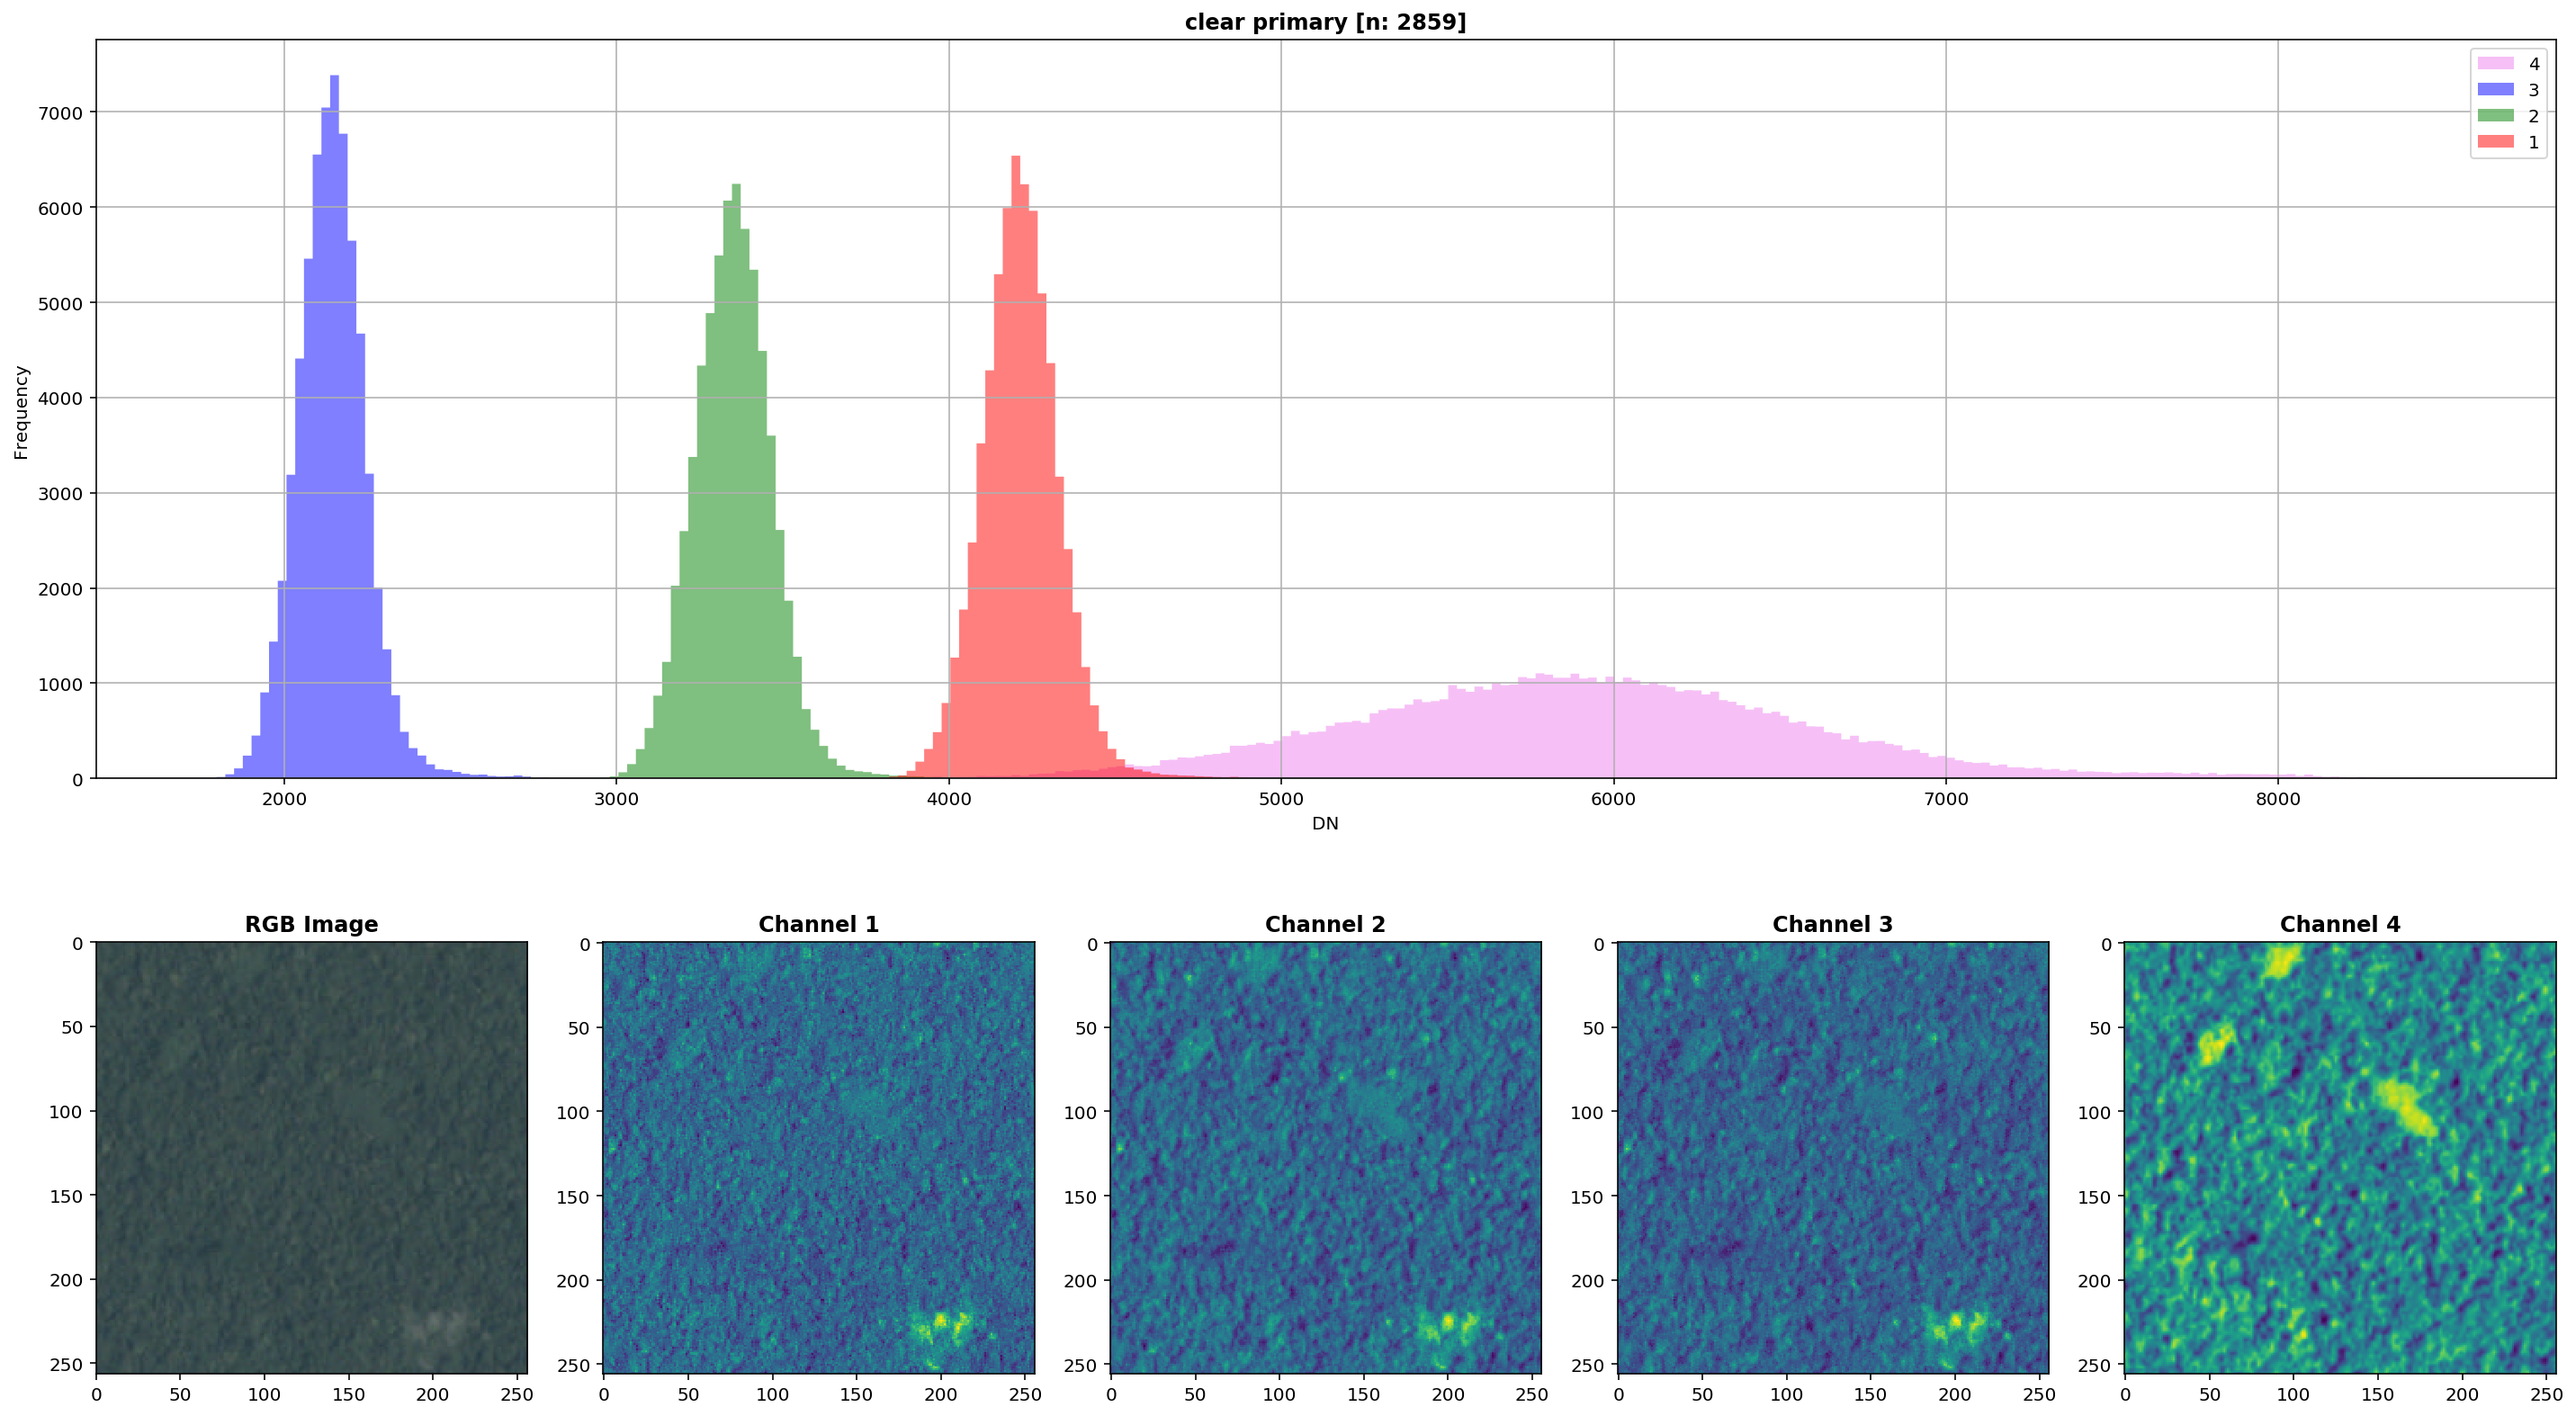

In [3]:
def plot_img(randimg_id, imagedir, jpgdir):
    fig = plt.figure()
    gs = plt.GridSpec(2,5)
    titles = images.loc[randimg_id].tags + " [n: %d]" % randimg_id
    randimg = rio.open(os.path.join(DATA_ROOT, imagedir, img_template % (randimg_id, 'tif')))
    randimg_jpg = rio.open(os.path.join(DATA_ROOT, jpgdir, img_template % (randimg_id, 'jpg')))
    show_hist(randimg, title=titles, histtype='stepfilled', stacked=False, bins=256, alpha=0.5, ax=plt.subplot(gs[0, :]))
    show(randimg_jpg,     ax=plt.subplot(gs[1, 0]), title='RGB Image')
    show(randimg.read(1), ax=plt.subplot(gs[1, 1]), title='Channel 1')
    show(randimg.read(2), ax=plt.subplot(gs[1, 2]), title='Channel 2')
    show(randimg.read(3), ax=plt.subplot(gs[1, 3]), title='Channel 3')
    show(randimg.read(4), ax=plt.subplot(gs[1, 4]), title='Channel 4')
    plt.tight_layout()
    
for i in range(5):
    plot_img(np.random.choice(len(images)), imagedir, jpgdir)

In [4]:
randimg_id = np.random.choice(len(images))
randimg = rio.open(os.path.join(DATA_ROOT, imagedir, img_template % (randimg_id, 'tif')))
randimg.read().shape

/home/ec2-user/miniconda3/envs/imageprocess/lib/python3.6/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


(4, 256, 256)

In [5]:
dat = randimg.read()
dat[:, 2:2+5, 2:2+5].shape

(4, 5, 5)

In [6]:
!ls

code  data  initial.ipynb  README.md  Untitled.ipynb


/home/ec2-user/miniconda3/envs/imageprocess/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


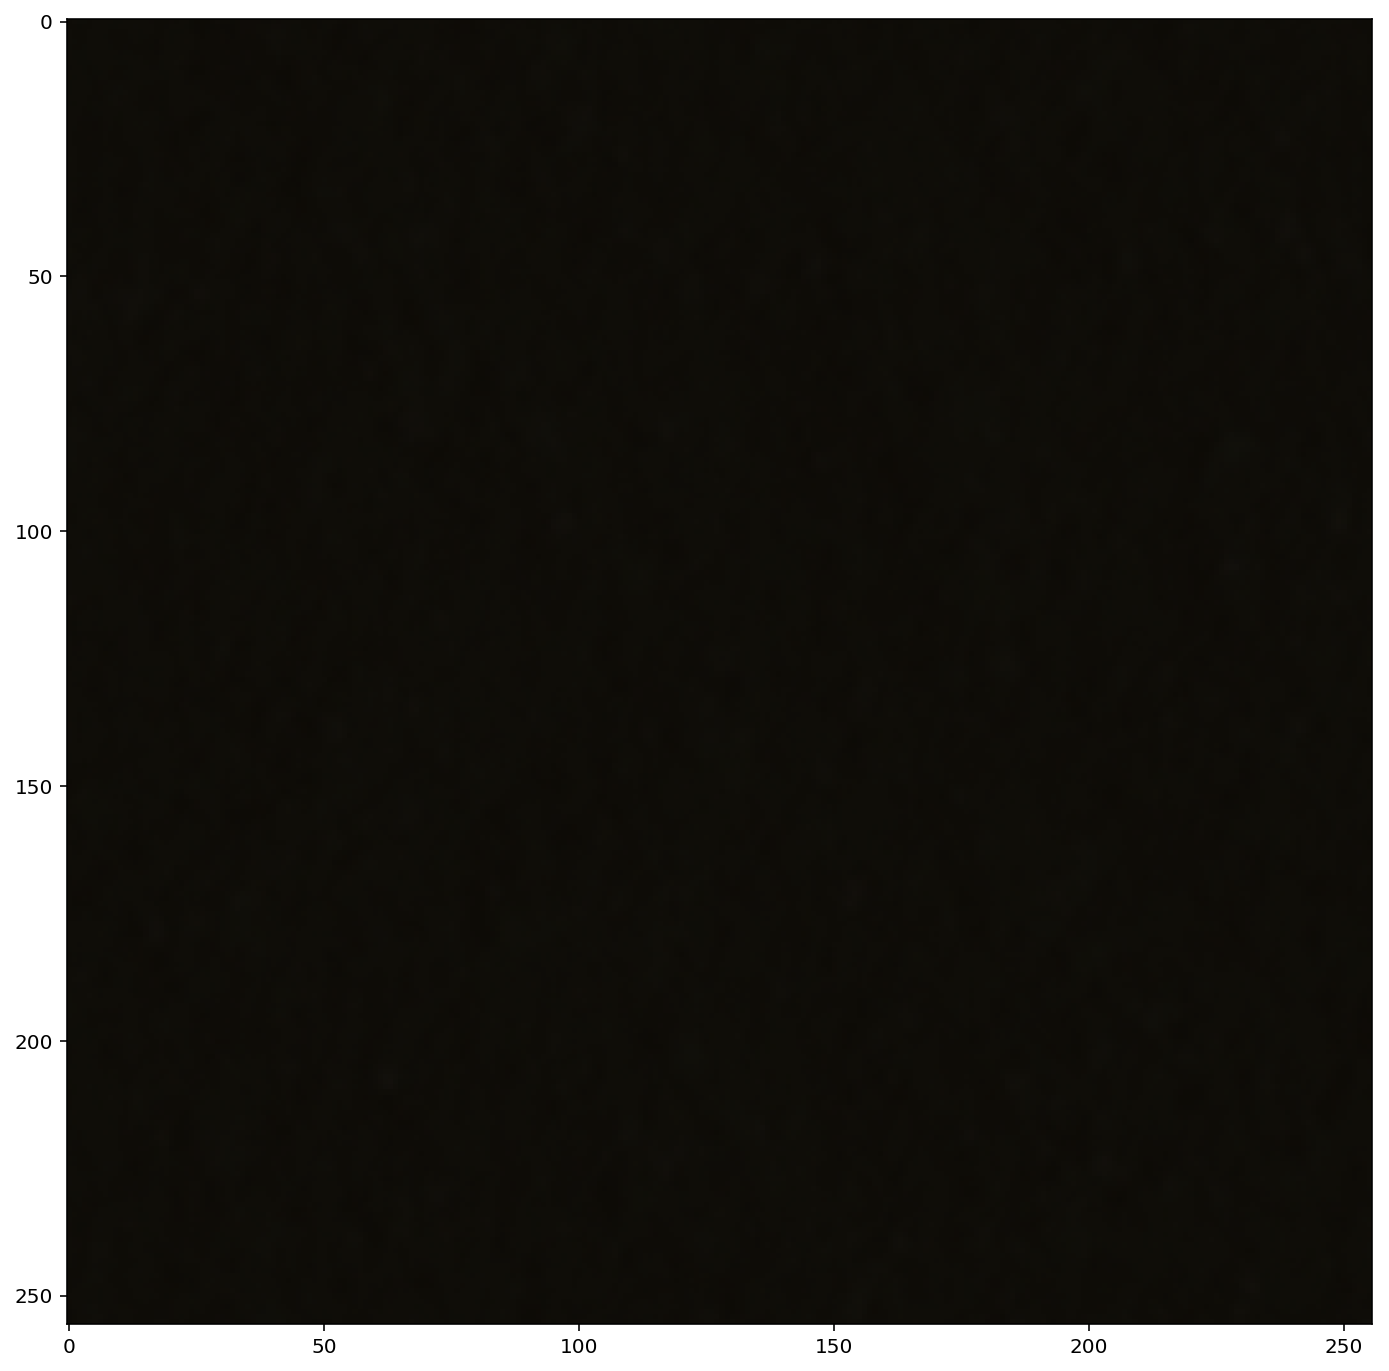

In [7]:
from skimage.exposure import equalize_hist, equalize_adapthist
plt.imshow(np.transpose(img_as_ubyte(randimg.read()),[1, 2, 0])[:, :, 0:3])


In [8]:
plt.imshow(np.transpose(equalize_adapthist(randimg.read()),[1, 2, 0])[:, :, 0:3])

ZeroDivisionError: division by zero

In [24]:
d,x,y = randimg.read().shape

(np.array(range(0, x*y, 5+2)) % y)[:100]

array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
        91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175,
       182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252,   3,  10,
        17,  24,  31,  38,  45,  52,  59,  66,  73,  80,  87,  94, 101,
       108, 115, 122, 129, 136, 143, 150, 157, 164, 171, 178, 185, 192,
       199, 206, 213, 220, 227, 234, 241, 248, 255,   6,  13,  20,  27,
        34,  41,  48,  55,  62,  69,  76,  83,  90,  97, 104, 111, 118,
       125, 132, 139, 146, 153, 160, 167, 174, 181])